In [6]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [7]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [9]:
# Create a list for holding the cities
cities = []
# Identify the nearest ity for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

617

In [10]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key


In [11]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a51a985e5791fedf0cfe595b0ac56f4


In [12]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | trairi
Processing Record 2 of Set 1 | samatau
City not found. Skipping...
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | new norfolk
Processing Record 6 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 7 of Set 1 | college
Processing Record 8 of Set 1 | sisimiut
Processing Record 9 of Set 1 | barrow
Processing Record 10 of Set 1 | ransang
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 14 of Set 1 | krasnoselkup
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 1 | guerrero negro
Processing Record 18 of Set 1 | omsukchan
Processing Record 19 of Set 1 | kavieng
Processing Record 20 of Set 1 | ushua

Processing Record 42 of Set 4 | mar del plata
Processing Record 43 of Set 4 | knysna
Processing Record 44 of Set 4 | barbar
City not found. Skipping...
Processing Record 45 of Set 4 | maniwaki
Processing Record 46 of Set 4 | kahului
Processing Record 47 of Set 4 | darnah
Processing Record 48 of Set 4 | port hedland
Processing Record 49 of Set 4 | te anau
Processing Record 50 of Set 4 | sinnamary
Processing Record 1 of Set 5 | birmitrapur
Processing Record 2 of Set 5 | zhigansk
Processing Record 3 of Set 5 | sao jose da coroa grande
Processing Record 4 of Set 5 | amderma
City not found. Skipping...
Processing Record 5 of Set 5 | bocas del toro
Processing Record 6 of Set 5 | blind river
Processing Record 7 of Set 5 | dubai
Processing Record 8 of Set 5 | puerto madryn
Processing Record 9 of Set 5 | alice springs
Processing Record 10 of Set 5 | san andres
Processing Record 11 of Set 5 | saint-joseph
Processing Record 12 of Set 5 | richards bay
Processing Record 13 of Set 5 | verkhnevilyuys

City not found. Skipping...
Processing Record 31 of Set 8 | haines junction
Processing Record 32 of Set 8 | lagoa
Processing Record 33 of Set 8 | les cayes
Processing Record 34 of Set 8 | rio grande
Processing Record 35 of Set 8 | porto novo
Processing Record 36 of Set 8 | ulaanbaatar
Processing Record 37 of Set 8 | henties bay
Processing Record 38 of Set 8 | misratah
Processing Record 39 of Set 8 | shitanjing
Processing Record 40 of Set 8 | hirara
Processing Record 41 of Set 8 | shingu
Processing Record 42 of Set 8 | beloha
Processing Record 43 of Set 8 | mersing
Processing Record 44 of Set 8 | high level
Processing Record 45 of Set 8 | sahuaripa
Processing Record 46 of Set 8 | dongsheng
Processing Record 47 of Set 8 | basoko
Processing Record 48 of Set 8 | xiongzhou
Processing Record 49 of Set 8 | kalmunai
Processing Record 50 of Set 8 | yerbogachen
Processing Record 1 of Set 9 | minab
Processing Record 2 of Set 9 | vila velha
Processing Record 3 of Set 9 | nome
Processing Record 4 o

Processing Record 21 of Set 12 | halalo
City not found. Skipping...
Processing Record 22 of Set 12 | utiroa
City not found. Skipping...
Processing Record 23 of Set 12 | labutta
City not found. Skipping...
Processing Record 24 of Set 12 | mutare
Processing Record 25 of Set 12 | palmer
Processing Record 26 of Set 12 | bacong
Processing Record 27 of Set 12 | industrialnyy
City not found. Skipping...
Processing Record 28 of Set 12 | pacifica
Processing Record 29 of Set 12 | acajutla
Processing Record 30 of Set 12 | bombay
Processing Record 31 of Set 12 | xihe
Processing Record 32 of Set 12 | aginskoye
Processing Record 33 of Set 12 | state college
Processing Record 34 of Set 12 | nisia floresta
Processing Record 35 of Set 12 | bundaberg
Processing Record 36 of Set 12 | shirokiy
Processing Record 37 of Set 12 | aykhal
Processing Record 38 of Set 12 | kavaratti
Processing Record 39 of Set 12 | berlevag
Processing Record 40 of Set 12 | kismayo
Processing Record 41 of Set 12 | morros
Processin

In [14]:
# Checking to make sure there are at least 500 cities
len(city_data)

572

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Trairi,-3.2778,-39.2689,72.09,94,100,8.03,BR,2022-01-28 20:48:18
1,Busselton,-33.6500,115.3333,65.05,63,7,11.16,AU,2022-01-28 20:51:54
2,Mataura,-46.1927,168.8643,59.49,58,95,2.35,NZ,2022-01-28 20:51:54
3,New Norfolk,-42.7826,147.0587,63.66,70,96,1.99,AU,2022-01-28 20:47:48
4,College,64.8569,-147.8028,6.75,53,100,11.50,US,2022-01-28 20:51:56
5,Sisimiut,66.9395,-53.6735,18.91,66,100,19.84,GL,2022-01-28 20:51:57
6,Barrow,71.2906,-156.7887,-14.78,70,100,17.27,US,2022-01-28 20:51:58
7,Ransang,8.9603,117.5828,78.03,81,72,2.89,PH,2022-01-28 20:51:58
8,Vaini,-21.2000,-175.2000,82.29,79,99,19.22,TO,2022-01-28 20:51:59
9,Bredasdorp,-34.5322,20.0403,63.72,72,54,6.91,ZA,2022-01-28 20:51:19


In [16]:
# Reorder the columns for easier interpretation
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Trairi,BR,2022-01-28 20:48:18,-3.2778,-39.2689,72.09,94,100,8.03
1,Busselton,AU,2022-01-28 20:51:54,-33.6500,115.3333,65.05,63,7,11.16
2,Mataura,NZ,2022-01-28 20:51:54,-46.1927,168.8643,59.49,58,95,2.35
3,New Norfolk,AU,2022-01-28 20:47:48,-42.7826,147.0587,63.66,70,96,1.99
4,College,US,2022-01-28 20:51:56,64.8569,-147.8028,6.75,53,100,11.50
5,Sisimiut,GL,2022-01-28 20:51:57,66.9395,-53.6735,18.91,66,100,19.84
6,Barrow,US,2022-01-28 20:51:58,71.2906,-156.7887,-14.78,70,100,17.27
7,Ransang,PH,2022-01-28 20:51:58,8.9603,117.5828,78.03,81,72,2.89
8,Vaini,TO,2022-01-28 20:51:59,-21.2000,-175.2000,82.29,79,99,19.22
9,Bredasdorp,ZA,2022-01-28 20:51:19,-34.5322,20.0403,63.72,72,54,6.91


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


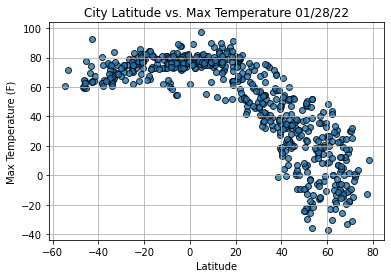

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

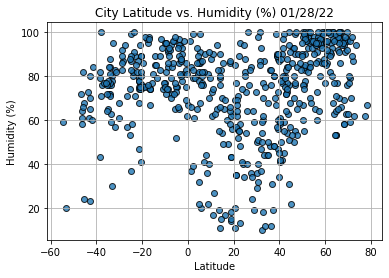

In [22]:

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity (%) "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

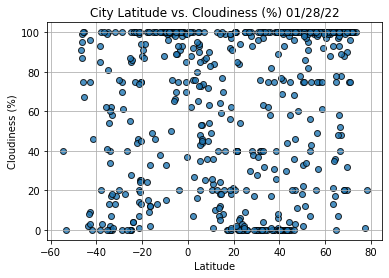

In [23]:

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

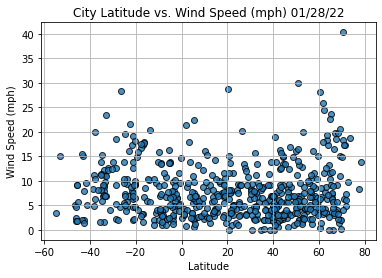

In [24]:

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed (mph) "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [25]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show() 

In [26]:
# Testing loc method in city_data_df 
index13 = city_data_df.loc[13]
index13

City                    Omsukchan
Country                        RU
Date          2022-01-28 20:48:39
Lat                       62.5333
Lng                         155.8
Max Temp                     0.12
Humidity                       95
Cloudiness                    100
Wind Speed                   7.83
Name: 13, dtype: object

In [27]:
# Get Northern and Southern Hemisphere latitudes in separate data frames
city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.loc[(city_data_df["Lat"] < 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Trairi,BR,2022-01-28 20:48:18,-3.2778,-39.2689,72.09,94,100,8.03
1,Busselton,AU,2022-01-28 20:51:54,-33.6500,115.3333,65.05,63,7,11.16
2,Mataura,NZ,2022-01-28 20:51:54,-46.1927,168.8643,59.49,58,95,2.35
3,New Norfolk,AU,2022-01-28 20:47:48,-42.7826,147.0587,63.66,70,96,1.99
8,Vaini,TO,2022-01-28 20:51:59,-21.2000,-175.2000,82.29,79,99,19.22
...,...,...,...,...,...,...,...,...,...
555,Lagunas,PE,2022-01-28 21:10:07,-5.2269,-75.6753,89.04,52,100,5.12
558,Bima,ID,2022-01-28 21:11:09,-8.4667,118.7167,76.53,93,100,1.63
562,Mareeba,AU,2022-01-28 21:11:12,-17.0000,145.4333,72.32,97,100,1.66
564,Aracatuba,BR,2022-01-28 21:11:14,-21.2089,-50.4328,80.51,68,100,6.93


In [28]:
# Assign new data frames to variables
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

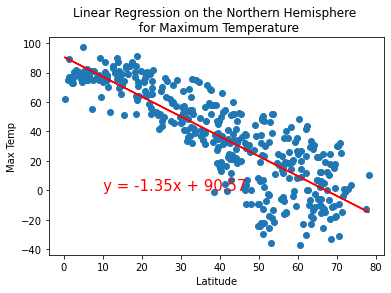

-0.8447059270368222


In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature',
                        'Max Temp',(10,0))
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)

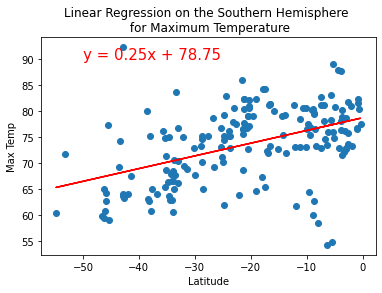

0.4580572996318973


In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',(-50,90))
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)

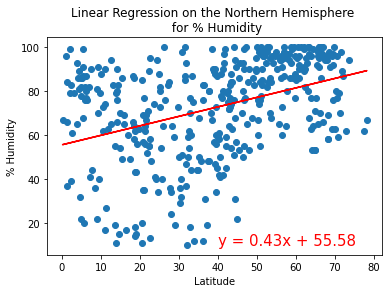

0.3858441820093052


In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', 
                       '% Humidity',(40,10))
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)

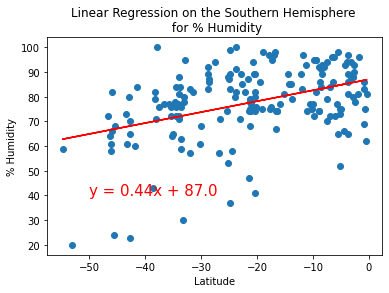

0.4131748085986014


In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,40))

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)

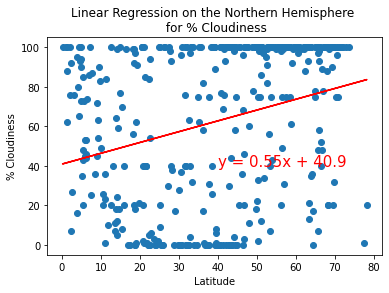

0.2808019734054143


In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness',(40,40))
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)

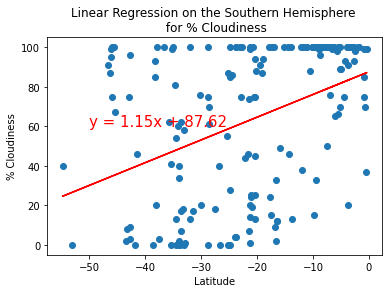

0.4082256063483729


In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)

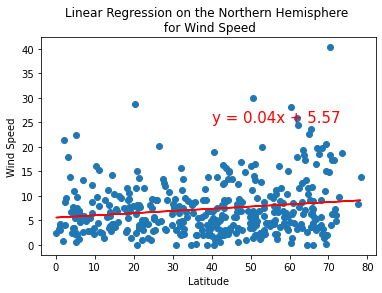

0.16539219956466342


In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 
                       'Wind Speed',(40,25))
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)

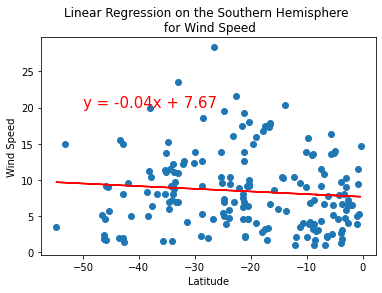

-0.09573840502517436


In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,20))

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)